In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#from PlotFunctions import plot_model
from sklearn.metrics import confusion_matrix
from sklearn import model_selection

In [3]:
train = pd.read_csv('train.csv', index_col = 0)

In [4]:
pd.set_option('display.max_columns', None)
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
f = open("data_description.txt", "r")
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [6]:
tr2 = train.copy()

In [7]:
mask = ['Alley','PoolQC','Fence', 'MiscFeature']

tr2.drop(columns=mask)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500


In [116]:
train_sun = tr2[tr2.columns[25:50]]
train_sun['SalesPrice'] = tr2['SalePrice']
train_sun

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,SalesPrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,
1,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,208500
2,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,181500
3,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,223500
4,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,140000
5,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,250000
6,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,143000
7,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,307000
8,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,200000
9,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,129900


In [9]:
pd.set_option('display.max_columns', None)
train_sun .loc[:, train_sun .dtypes == np.object] #categorical columns

,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical
Id,,,,,,,,,,,,
1,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr
2,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr
3,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr
4,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr
5,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr
1457,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr
1458,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18a36d50>,
      dtype=object)

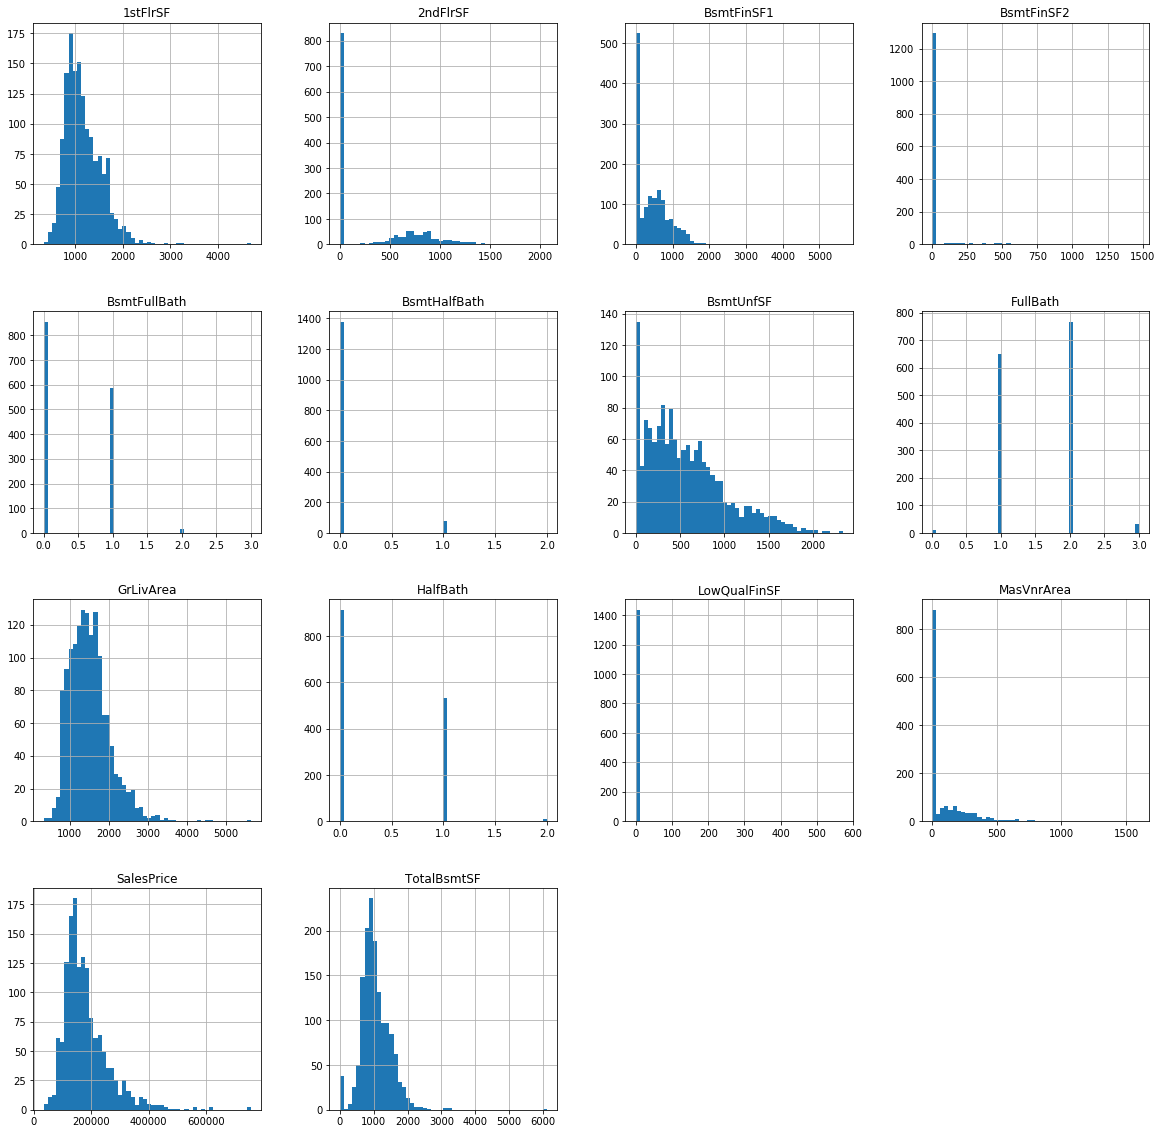

In [10]:
train_sun.hist(bins=50, figsize=(20,20))

In [11]:
pd.set_option('display.max_columns', None)
train_sun.describe()

,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,SalesPrice
count,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,180921.195890
std,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,129975.000000
50%,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,163000.000000
75%,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,214000.000000
max,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,755000.000000


In [12]:
train_sun

,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,SalesPrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,
1,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,208500
2,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,181500
3,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,223500
4,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,140000
5,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,175000
1457,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,210000
1458,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,266500


In [100]:
train_sun.isnull().sum()

MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
SalesPrice       0
dtype: int64

In [13]:
pd.set_option('display.max_columns', None)
train_sun.info() 
#tr2.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MasVnrArea    1452 non-null   float64
 1   ExterQual     1460 non-null   object 
 2   ExterCond     1460 non-null   object 
 3   Foundation    1460 non-null   object 
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinSF1    1460 non-null   int64  
 9   BsmtFinType2  1422 non-null   object 
 10  BsmtFinSF2    1460 non-null   int64  
 11  BsmtUnfSF     1460 non-null   int64  
 12  TotalBsmtSF   1460 non-null   int64  
 13  Heating       1460 non-null   object 
 14  HeatingQC     1460 non-null   object 
 15  CentralAir    1460 non-null   object 
 16  Electrical    1459 non-null   object 
 17  1stFlrSF      1460 non-null   int64  
 18  2ndFlrSF      1460 non-null 

Distinct features

Quantitative: 
    - MasVnrArea 
    - BsmtFinSF1
    - BsmtFinSF2
    - BsmtUnfSF
    - TotalBsmtSF 
    - 1stFlrSF
    - 2ndFlrSF
    - LowQualFinSF
    - GrLivArea  
  
    
Ordinal Categorical:
    - ExterQual
    - ExterCond
    - BsmtQual
    - BsmtCond
    - HeatingQC 

    - BsmtFinType1
    - BsmtFinType2
    
    
Nominal Categorical:
    - Foundation
    - BsmtExposure
    - Heating
    - CentralAir
    - Electrical
    - BsmtFullBath (0 and 1 int)
    - BsmtHalfBath (int)
    - FullBath (int)
    - HalfBath (int)
    
    
    


In [14]:
quantitative = [ "MasVnrArea","BsmtFinSF1", 
                "BsmtFinSF2","BsmtUnfSF",
                "TotalBsmtSF", "1stFlrSF",
                "2ndFlrSF", "LowQualFinSF",
                "GrLivArea","SalesPrice"]

In [15]:
categorical_ordinal = ["ExterQual", "ExterCond",
                       "BsmtQual", "BsmtCond",
                       "HeatingQC", "BsmtFinType1",
                       "BsmtFinType2"]


In [16]:
categorical_nominal = ["Foundation", "BsmtExposure",
                       "Heating", "CentralAir",
                       "Electrical", "BsmtFullBath",
                       "BsmtHalfBath", "FullBath",
                       "HalfBath"]

In [17]:
for i in categorical_ordinal:
    print (train_sun[i].value_counts())

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


In [18]:
for i in categorical_nominal:
    print (train_sun[i].value_counts())

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64
0    913
1    535
2     12
Name: HalfBath, dtype: int64


## Quantitative Features

In [19]:
#reference: https://www.kaggle.com/neerunaveenjakhar/simple-regression-modelling
sns.set(font_scale=1)
    

In [20]:
train_sun["SalesPrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalesPrice, dtype: float64

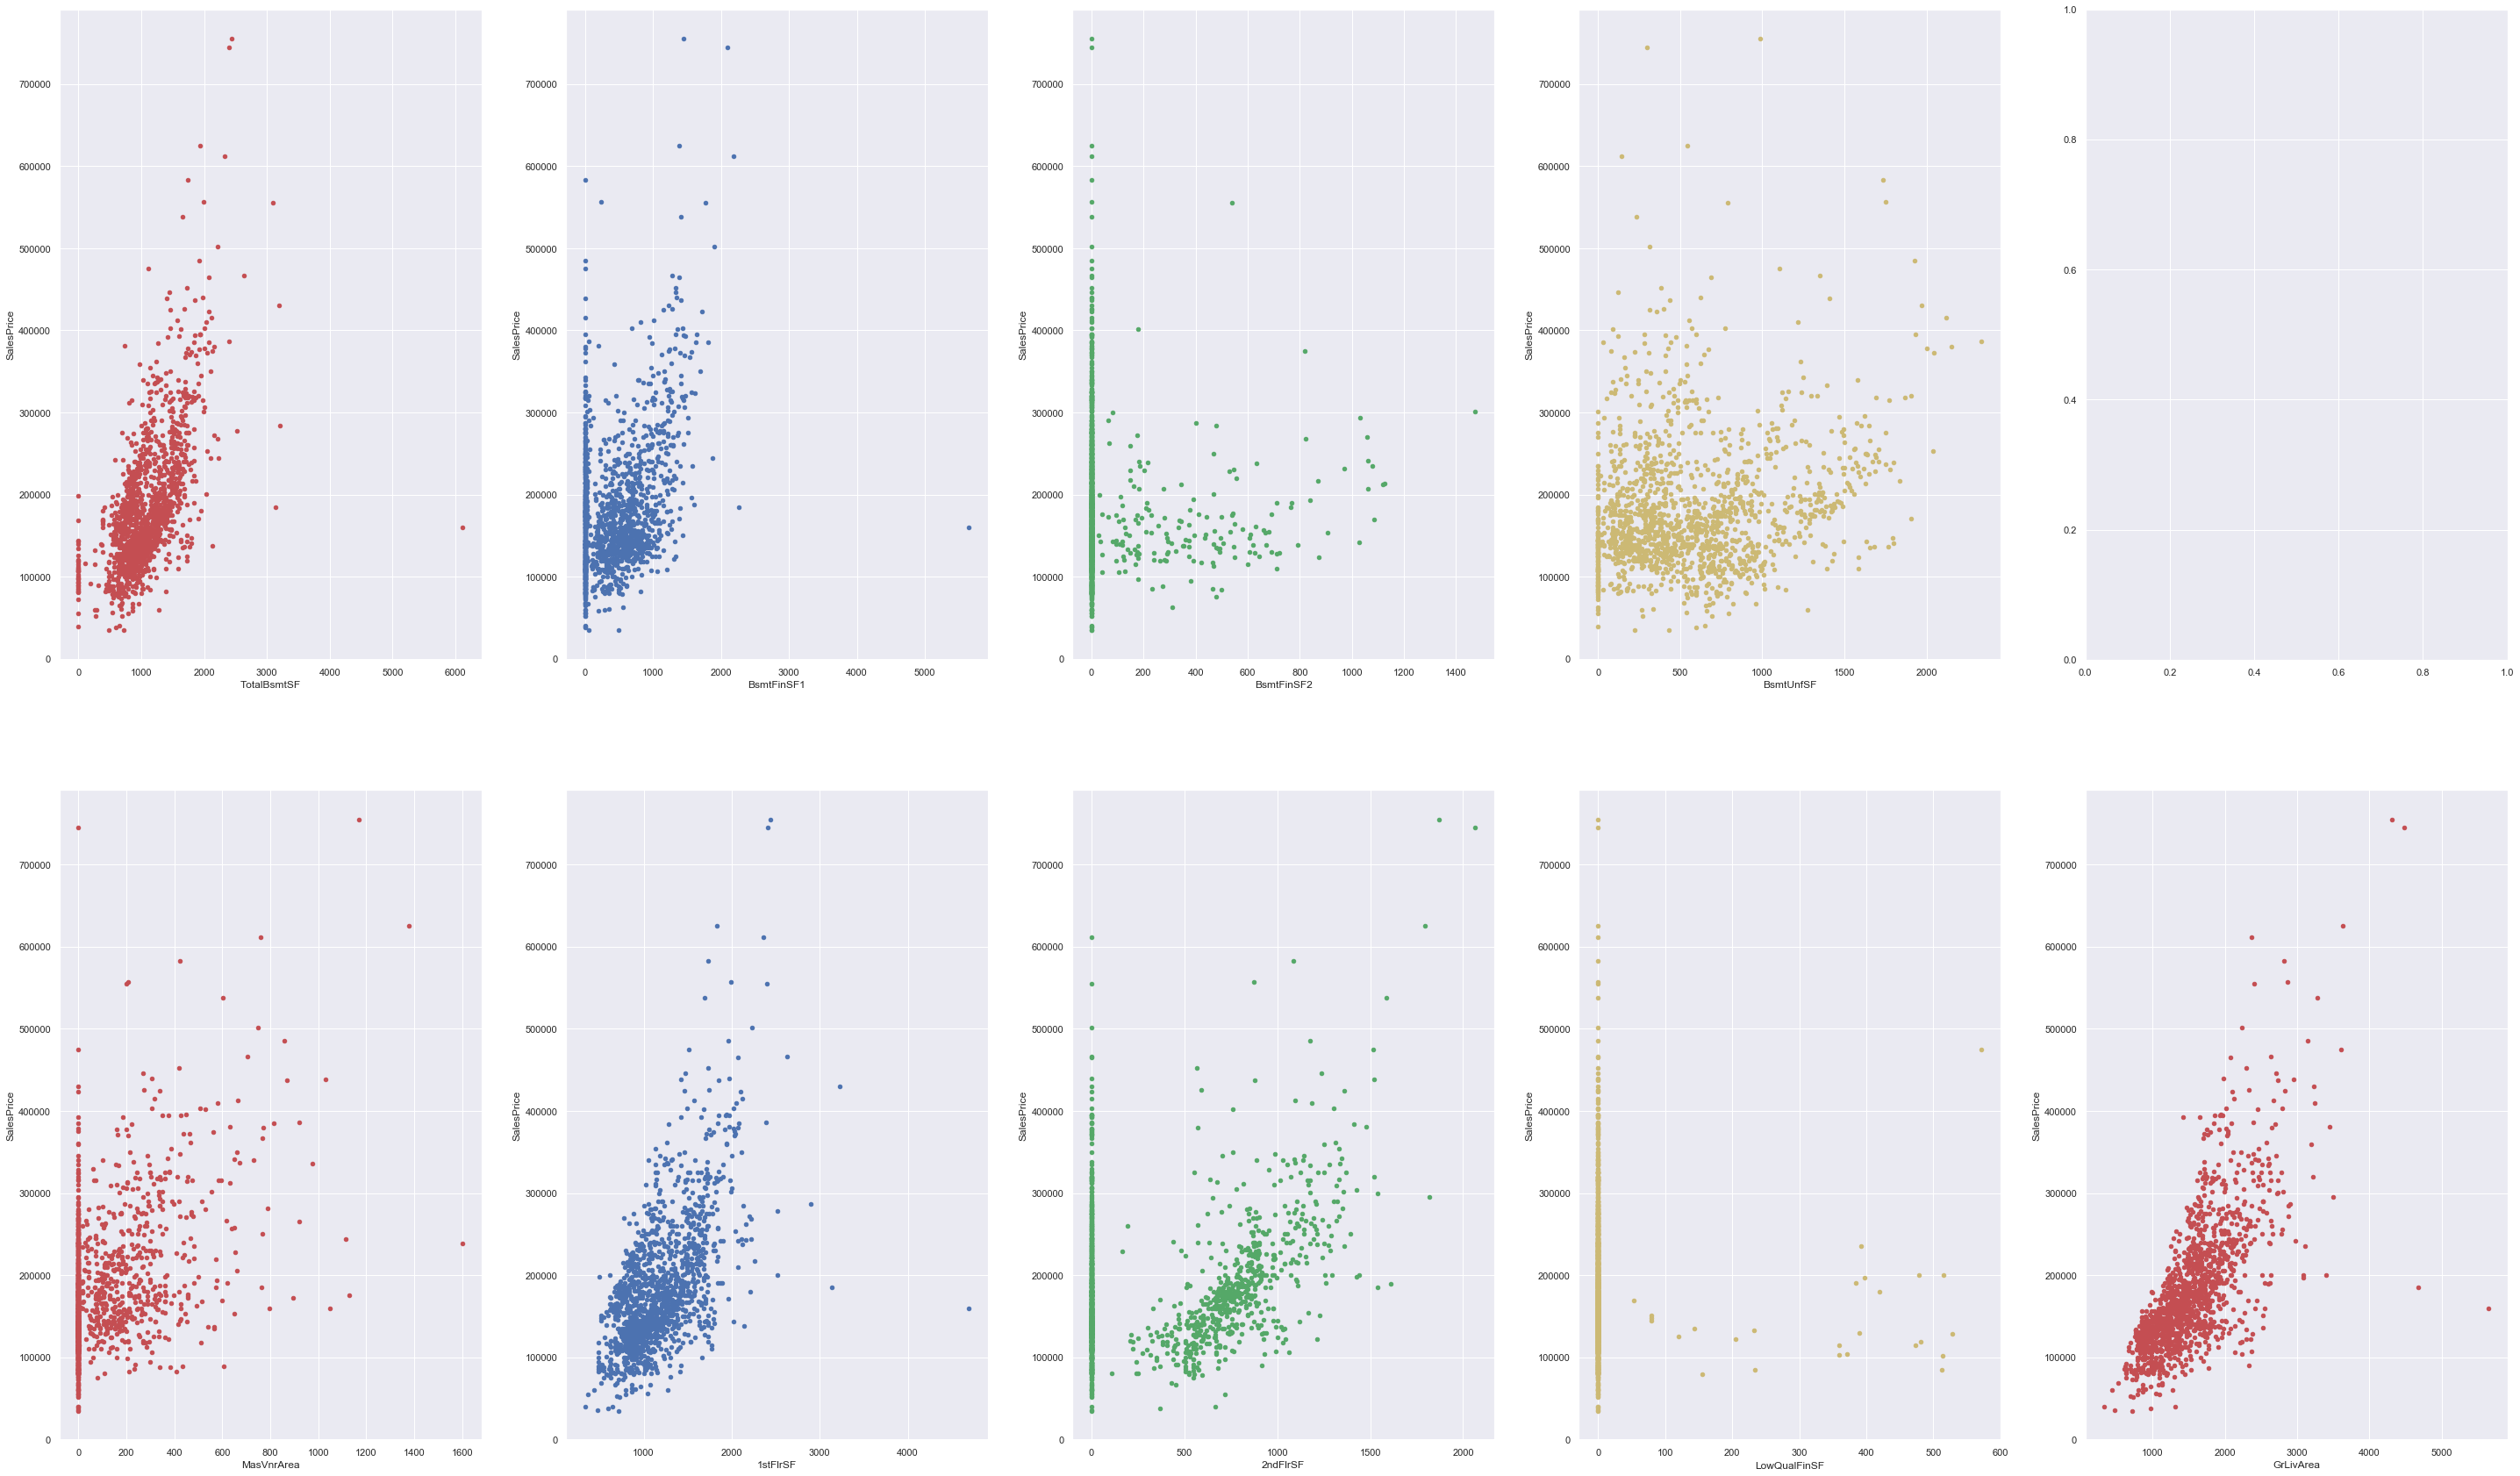

In [21]:
quantitative = [ "MasVnrArea","BsmtFinSF1", 
                "BsmtFinSF2","BsmtUnfSF",
                "TotalBsmtSF", "1stFlrSF",
                "2ndFlrSF", "LowQualFinSF",
                "GrLivArea", "SalesPrice"]
fig, (axes,axes2) = plt.subplots(nrows=2, ncols=5, figsize=(50, 30))


train_sun.plot(ax=axes[0], kind='scatter', x='TotalBsmtSF', y='SalesPrice',c='r')
train_sun.plot(ax=axes[1], kind='scatter', x='BsmtFinSF1', y='SalesPrice',c='b')
train_sun.plot(ax=axes[2], kind='scatter', x='BsmtFinSF2', y='SalesPrice',c='g')
train_sun.plot(ax=axes[3], kind='scatter', x="BsmtUnfSF", y='SalesPrice',c='y')
train_sun.plot(ax=axes2[0,], kind='scatter', x="MasVnrArea", y='SalesPrice',c='r')
train_sun.plot(ax=axes2[1,], kind='scatter', x="1stFlrSF", y='SalesPrice',c='b')
train_sun.plot(ax=axes2[2,], kind='scatter', x="2ndFlrSF", y='SalesPrice',c='g')
train_sun.plot(ax=axes2[3,], kind='scatter', x="LowQualFinSF", y='SalesPrice',c='y')
train_sun.plot(ax=axes2[4,], kind='scatter', x="GrLivArea", y='SalesPrice',c='r')

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a6cc690>,
      dtype=object)

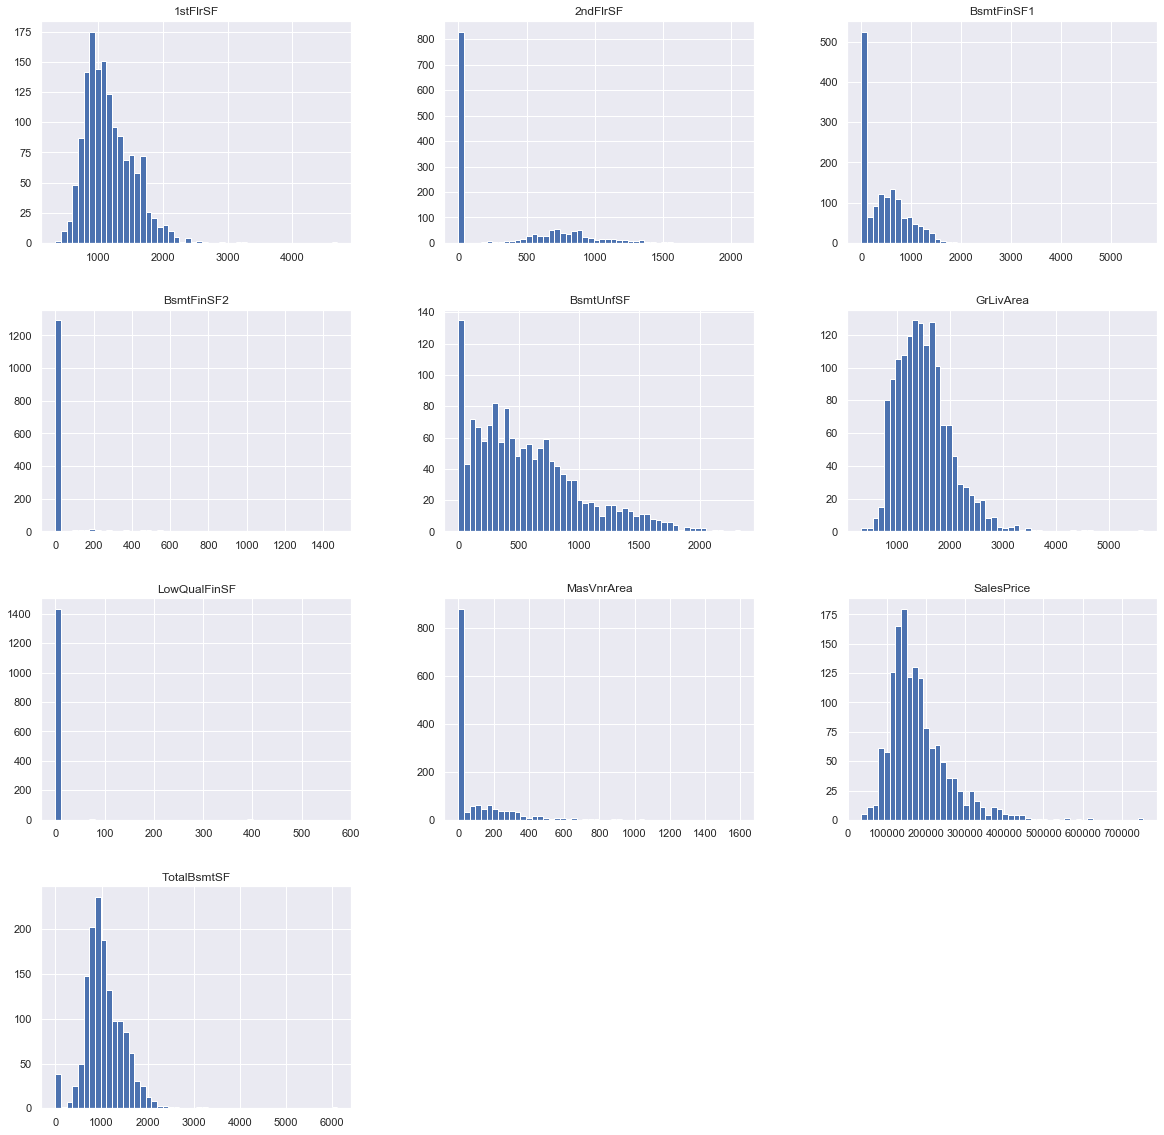

In [22]:
train_sun[quantitative].hist(bins=50, figsize=(20,20))

In [23]:
## high correlation between quantitatives
correlation = train_sun[quantitative].corr()
correlation

,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,SalesPrice
MasVnrArea,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.477493
BsmtFinSF1,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.386420
BsmtFinSF2,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,-0.011378
BsmtUnfSF,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,0.214479
TotalBsmtSF,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.613581
1stFlrSF,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.605852
2ndFlrSF,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,0.319334
LowQualFinSF,-0.069071,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.025606
GrLivArea,0.390857,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,0.134683,1.000000,0.708624
SalesPrice,0.477493,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,-0.025606,0.708624,1.000000


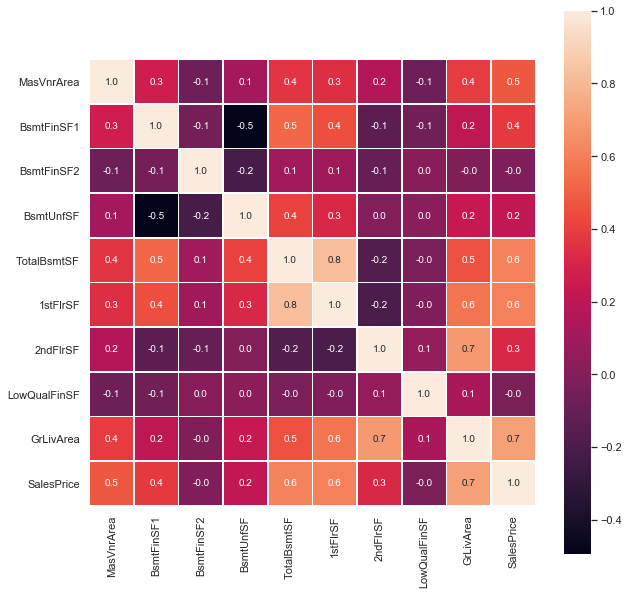

In [24]:
## heatmap of correlation between price and quantitatives

plt.figure(figsize=(10,10))
sns.set(font_scale=1)
ax=sns.heatmap(train_sun[quantitative].corr(),square=True, annot=True,annot_kws={"size": 10}, fmt='.1f', linewidths=.5) 

## TotalBsmtSF, 1stFlrSF, and GrLivArea 
## have the highest correlation with the SalesPrice
## check for multicollinearity with team member's features




In [25]:
## correlation between price and quantitatives
correlation = train_sun[quantitative].corr()
correlation["SalesPrice"].sort_values(ascending=False)

# TotalBsmtSF and 1stFlrSF  

SalesPrice      1.000000
GrLivArea       0.708624
TotalBsmtSF     0.613581
1stFlrSF        0.605852
MasVnrArea      0.477493
BsmtFinSF1      0.386420
2ndFlrSF        0.319334
BsmtUnfSF       0.214479
BsmtFinSF2     -0.011378
LowQualFinSF   -0.025606
Name: SalesPrice, dtype: float64

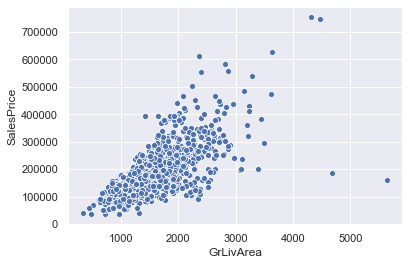

In [26]:
sns.set(font_scale=1)
sns.scatterplot(x = train_sun['GrLivArea'], 
                y = train_sun['SalesPrice'])


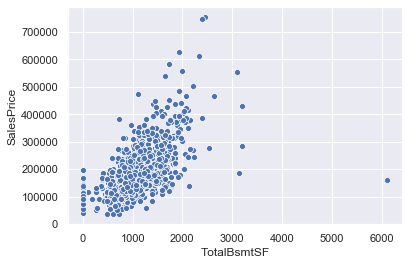

In [27]:
sns.set(font_scale=1)
sns.scatterplot(x = train_sun['TotalBsmtSF'], 
                y = train_sun['SalesPrice'])

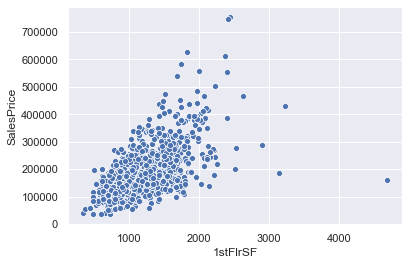

In [28]:
sns.set(font_scale=1)
sns.scatterplot(x = train_sun['1stFlrSF'], 
                y = train_sun['SalesPrice'])

In [29]:
train_sun[quantitative]

,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,SalesPrice
Id,,,,,,,,,,
1,196.0,706,0,150,856,856,854,0,1710,208500
2,0.0,978,0,284,1262,1262,0,0,1262,181500
3,162.0,486,0,434,920,920,866,0,1786,223500
4,0.0,216,0,540,756,961,756,0,1717,140000
5,350.0,655,0,490,1145,1145,1053,0,2198,250000
...,...,...,...,...,...,...,...,...,...,...
1456,0.0,0,0,953,953,953,694,0,1647,175000
1457,119.0,790,163,589,1542,2073,0,0,2073,210000
1458,0.0,275,0,877,1152,1188,1152,0,2340,266500


In [101]:
train_sun[quantitative].isnull().sum()

MasVnrArea      8
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
SalesPrice      0
dtype: int64

                            OLS Regression Results                            
Dep. Variable:             SalesPrice   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     371.8
Date:                Sun, 31 May 2020   Prob (F-statistic):          2.44e-318
Time:                        17:38:37   Log-Likelihood:                -17794.
No. Observations:                1460   AIC:                         3.560e+04
Df Residuals:                    1452   BIC:                         3.565e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2785.4470   4490.082     -0.620   

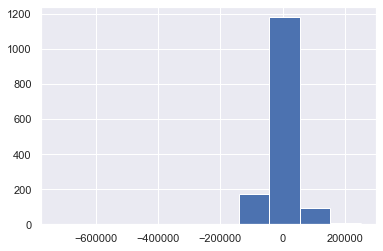

In [30]:
# Linear Model for all

from sklearn.linear_model import LinearRegression

X,y = train_sun[quantitative].fillna(0).drop('SalesPrice', 1), train_sun.SalesPrice
X=X.select_dtypes(exclude=[object])

lm = LinearRegression()
lm.fit(X, y)
residuals = y - lm.predict(X)
plt.hist(residuals)


import statsmodels.api as sm
x = sm.add_constant(X)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

In [31]:
pValues = results.pvalues
print('The significant coefficients')
pValues[pValues<0.05]

The significant coefficients


MasVnrArea      3.783666e-15
BsmtFinSF1      3.036031e-19
BsmtUnfSF       3.463849e-05
TotalBsmtSF     4.403585e-22
1stFlrSF        3.742645e-09
2ndFlrSF        5.213800e-12
LowQualFinSF    7.734270e-04
GrLivArea       7.449463e-06
dtype: float64

In [32]:
# 3-feature combinations

scores = {} # used to record the R^2 of each 3-feature combinations

for idx, name1 in enumerate(X.columns):
        myColumns = X.columns[(idx+1):]
        for idx2, name2 in enumerate(myColumns):
            myColumns2 = myColumns[(idx2+1):]
            for idx3, name3 in enumerate(myColumns2):                
                X2 = X[[name1, name2, name3]]
                lm.fit(X2, np.log(y))
                scores[(name1, name2, name3)] = lm.score(X2, np.log(y))
                
sorted(scores.items(), key=lambda t:t[1], reverse=True)[:15]

[(('TotalBsmtSF', 'LowQualFinSF', 'GrLivArea'), 0.6095459916969816),
 (('MasVnrArea', 'TotalBsmtSF', 'GrLivArea'), 0.6091266125564627),
 (('TotalBsmtSF', '1stFlrSF', '2ndFlrSF'), 0.6074773138184211),
 (('BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea'), 0.6061259026367),
 (('BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea'), 0.6040806481128954),
 (('TotalBsmtSF', '2ndFlrSF', 'GrLivArea'), 0.6011279306358052),
 (('BsmtFinSF2', 'TotalBsmtSF', 'GrLivArea'), 0.6006107921380444),
 (('TotalBsmtSF', '1stFlrSF', 'GrLivArea'), 0.5999756614111235),
 (('BsmtFinSF1', 'BsmtUnfSF', 'GrLivArea'), 0.5974574533559068),
 (('BsmtFinSF1', '1stFlrSF', '2ndFlrSF'), 0.5788157740077593),
 (('MasVnrArea', 'TotalBsmtSF', '2ndFlrSF'), 0.5748883358496241),
 (('MasVnrArea', '1stFlrSF', '2ndFlrSF'), 0.5738997638456212),
 (('BsmtFinSF1', '1stFlrSF', 'GrLivArea'), 0.57128970315562),
 (('BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF'), 0.569229981096053),
 (('MasVnrArea', '1stFlrSF', 'GrLivArea'), 0.5674999230340141)]

In [33]:
print('Positive slope columns %s' %(X.columns[lm.coef_>0]))
print('--'*50)
print('Negative slope columns %s' %(X.columns[lm.coef_<0]))


IndexError: boolean index did not match indexed array along dimension 0; dimension is 9 but corresponding boolean dimension is 3

In [ ]:
# Linear Model for BsmtFinSF1

from sklearn.linear_model import LinearRegression

X,y = train_sun[["BsmtFinSF1"]].fillna(0), train_sun.SalesPrice
#X=X.select_dtypes(exclude=[object])

lm = LinearRegression()
lm.fit(X, y)
residuals = y - lm.predict(X)
plt.hist(residuals)


import statsmodels.api as sm
x = sm.add_constant(X)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
# Linear Model for GrLivArea

from sklearn.linear_model import LinearRegression

X,y = train_sun[["GrLivArea"]].fillna(0), train_sun.SalesPrice
#X=X.select_dtypes(exclude=[object])

lm = LinearRegression()
lm.fit(X, y)
residuals = y - lm.predict(X)
plt.hist(residuals)


import statsmodels.api as sm
x = sm.add_constant(X)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

In [ ]:
# Linear Model for TotalBsmtSF

from sklearn.linear_model import LinearRegression

X,y = train_sun[["TotalBsmtSF"]].fillna(0), train_sun.SalesPrice
#X=X.select_dtypes(exclude=[object])

lm = LinearRegression()
lm.fit(X, y)
residuals = y - lm.predict(X)
plt.hist(residuals)


import statsmodels.api as sm
x = sm.add_constant(X)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             SalesPrice   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     845.5
Date:                Sat, 30 May 2020   Prob (F-statistic):          5.39e-147
Time:                        21:23:06   Log-Likelihood:                -18210.
No. Observations:                1460   AIC:                         3.642e+04
Df Residuals:                    1458   BIC:                         3.643e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.617e+04   5245.728      6.896      0.0

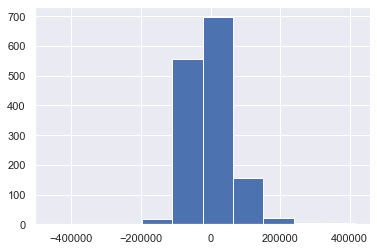

In [51]:
# Linear Model for 1stFlrSF

from sklearn.linear_model import LinearRegression

X,y = train_sun[["1stFlrSF"]].fillna(0), train_sun.SalesPrice
#X=X.select_dtypes(exclude=[object])

lm = LinearRegression()
lm.fit(X, y)
residuals = y - lm.predict(X)
plt.hist(residuals)


import statsmodels.api as sm
x = sm.add_constant(X)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             SalesPrice   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     419.3
Date:                Sun, 31 May 2020   Prob (F-statistic):           4.10e-82
Time:                        17:38:41   Log-Likelihood:                -18359.
No. Observations:                1460   AIC:                         3.672e+04
Df Residuals:                    1458   BIC:                         3.673e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.595e+05   2110.405     75.578      0.0

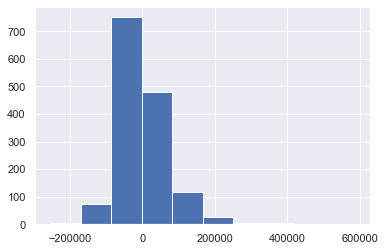

In [34]:
# Linear Model for MasVnrArea

from sklearn.linear_model import LinearRegression

X,y = train_sun[["MasVnrArea"]].fillna(0), train_sun.SalesPrice
#X=X.select_dtypes(exclude=[object])

lm = LinearRegression()
lm.fit(X, y)
residuals = y - lm.predict(X)
plt.hist(residuals)


import statsmodels.api as sm
x = sm.add_constant(X)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

## Nominal Categorical Features


In [35]:
train_sun[categorical_nominal]

,Foundation,BsmtExposure,Heating,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
Id,,,,,,,,,
1,PConc,No,GasA,Y,SBrkr,1,0,2,1
2,CBlock,Gd,GasA,Y,SBrkr,0,1,2,0
3,PConc,Mn,GasA,Y,SBrkr,1,0,2,1
4,BrkTil,No,GasA,Y,SBrkr,1,0,1,0
5,PConc,Av,GasA,Y,SBrkr,1,0,2,1
...,...,...,...,...,...,...,...,...,...
1456,PConc,No,GasA,Y,SBrkr,0,0,2,1
1457,CBlock,No,GasA,Y,SBrkr,1,0,2,0
1458,Stone,No,GasA,Y,SBrkr,0,0,2,0


In [103]:
train_sun[categorical_nominal].isnull().sum()

Foundation       0
BsmtExposure    38
Heating          0
CentralAir       0
Electrical       1
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
dtype: int64

In [36]:
for i in categorical_nominal:
    print (train_sun[i].value_counts())

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64
0    913
1    535
2     12
Name: HalfBath, dtype: int64


In [37]:
nominal_features = train_sun[["Foundation", "BsmtExposure",
                       "Heating", "CentralAir",
                       "Electrical", "BsmtFullBath",
                       "BsmtHalfBath", "FullBath",
                       "HalfBath"]].copy()
y = np.log(train_sun['SalesPrice'])
#nominal_features['CentralAir'] = nominal_features.CentralAir.map(lambda x: 0 if x==0 else 1)



In [38]:
nominal_features 

,Foundation,BsmtExposure,Heating,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
Id,,,,,,,,,
1,PConc,No,GasA,Y,SBrkr,1,0,2,1
2,CBlock,Gd,GasA,Y,SBrkr,0,1,2,0
3,PConc,Mn,GasA,Y,SBrkr,1,0,2,1
4,BrkTil,No,GasA,Y,SBrkr,1,0,1,0
5,PConc,Av,GasA,Y,SBrkr,1,0,2,1
...,...,...,...,...,...,...,...,...,...
1456,PConc,No,GasA,Y,SBrkr,0,0,2,1
1457,CBlock,No,GasA,Y,SBrkr,1,0,2,0
1458,Stone,No,GasA,Y,SBrkr,0,0,2,0


In [39]:
dummy_Foundation = pd.get_dummies(nominal_features.Foundation, prefix='Foundation',drop_first=True)
dummy_BsmtExposure= pd.get_dummies(nominal_features.BsmtExposure, prefix="BsmtExposure",drop_first=True)
dummy_Heating = pd.get_dummies(nominal_features.Heating, prefix="Heating",drop_first=True)
dummy_central_air = pd.get_dummies(nominal_features.CentralAir, prefix='CentralAir',drop_first=True)
dummy_Electrical = pd.get_dummies(nominal_features.Electrical, prefix="Electrical",drop_first=True)
dummy_BsmtFullBath = pd.get_dummies(nominal_features.BsmtFullBath, prefix="BsmtFullBath",drop_first=True)
dummy_BsmtHalfBath = pd.get_dummies(nominal_features.BsmtHalfBath, prefix="BsmtHalfBath",drop_first=True)
dummy_FullBath = pd.get_dummies(nominal_features.FullBath, prefix="FullBath",drop_first=True)
dummy_HalfBath = pd.get_dummies(nominal_features.HalfBath, prefix="HalfBath",drop_first=True)

nominal_ordinal_X = pd.concat([dummy_Foundation, dummy_BsmtExposure, dummy_Heating, dummy_central_air, dummy_Electrical,dummy_BsmtFullBath, dummy_BsmtHalfBath,dummy_FullBath, dummy_HalfBath], axis=1)
nominal_ordinal_X


,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0
5,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1457,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0
1458,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [104]:
nominal_ordinal_X.isnull().sum()

Foundation_CBlock    0
Foundation_PConc     0
Foundation_Slab      0
Foundation_Stone     0
Foundation_Wood      0
BsmtExposure_Gd      0
BsmtExposure_Mn      0
BsmtExposure_No      0
Heating_GasA         0
Heating_GasW         0
Heating_Grav         0
Heating_OthW         0
Heating_Wall         0
CentralAir_Y         0
Electrical_FuseF     0
Electrical_FuseP     0
Electrical_Mix       0
Electrical_SBrkr     0
BsmtFullBath_1       0
BsmtFullBath_2       0
BsmtFullBath_3       0
BsmtHalfBath_1       0
BsmtHalfBath_2       0
FullBath_1           0
FullBath_2           0
FullBath_3           0
HalfBath_1           0
HalfBath_2           0
dtype: int64

R^2 is 0.6274
________________________________________
The intercept is 11.3816
________________________________________
The slopes are 
 Foundation_CBlock   -0.000883
Foundation_PConc     0.166740
Foundation_Slab     -0.254514
Foundation_Stone     0.215246
Foundation_Wood      0.060088
BsmtExposure_Gd      0.156172
BsmtExposure_Mn     -0.010348
BsmtExposure_No     -0.076887
Heating_GasA        -0.004155
Heating_GasW         0.192477
Heating_Grav        -0.126349
Heating_OthW         0.124618
Heating_Wall         0.015204
CentralAir_Y         0.318762
Electrical_FuseF    -0.009823
Electrical_FuseP    -0.143806
Electrical_Mix      -0.242427
Electrical_SBrkr     0.034438
BsmtFullBath_1       0.144793
BsmtFullBath_2       0.105966
BsmtFullBath_3      -0.238543
BsmtHalfBath_1       0.083523
BsmtHalfBath_2      -0.067284
FullBath_1          -0.022018
FullBath_2           0.288562
FullBath_3           0.686295
HalfBath_1           0.164515
HalfBath_2           0.062494
dtype: float64
-------

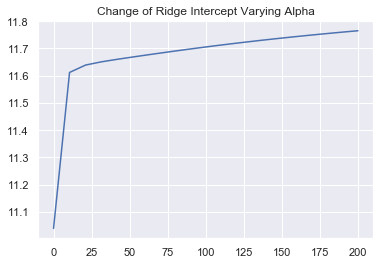

In [40]:
#Lasso and Ridge with Manual Grid Search'
# nominal_ordinal_X

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()

######Ridge######

alpha=1.0 #R^2 is 0.6320
ridge.set_params(alpha=alpha)
ridge.fit(nominal_ordinal_X, y)  
coefDF = pd.Series(ridge.coef_, index=nominal_ordinal_X.columns)
print('R^2 is %.4f' %(ridge.score(nominal_ordinal_X, y)))
print("__"*20)
print('The intercept is %.4f' %(ridge.intercept_))
print("__"*20)
print('The slopes are \n %s' %(coefDF))
print("---"*18)                  


# ### Check different alphas ###
# alpha = 20 #R^2 is 0.6168
# ridge.set_params(alpha=alpha)
# ridge.fit(nominal_ordinal_X, y)
# coefDF = pd.Series(ridge.coef_, index=nominal_ordinal_X.columns)
# print('R^2 is %.4f' %(ridge.score(nominal_ordinal_X, y)))
# print("__"*20)
# print('The intercept is %.4f' %(ridge.intercept_))
# print("__"*20)
# print('The slopes are \n %s' %(coefDF))
# print("---"*18)  



#### Plot ####
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-3,200,20)
for alpha in alphaRange:
    ridge.set_params(alpha=alpha)  #tuning alpha
    ridge.fit(nominal_ordinal_X, y)
    intercepts.append(ridge.intercept_)
    coefs.append(ridge.coef_)
    R2.append(ridge.score(nominal_ordinal_X, y))  
plt.plot(alphaRange, intercepts)
plt.title('Change of Ridge Intercept Varying Alpha')
print("Ridge plot with alpha np.linspace(0.001, 200, 20)")


# ### MODEL TESTING INCOMPLETE ###
# print("---"*18) 
# #1460 rows. Use it to split the data into a  70%  train-set and a  30%  test set 
# #1460*.30 = 438
# np.random.seed(1)
# testIdxes = np.random.choice(range(1460), size= 438, replace=False)
# trainIdxes = list(set(range(1460))-set(testIdxes))
# trainX = nominal_ordinal_X.iloc[trainIdxes]
# testX  = nominal_ordinal_X.iloc[testIdxes]
# trainY = y.iloc[trainIdxes]
# testY  = y.iloc[testIdxes]

# #################

# train_R2 = []
# test_R2  = []
# alphaRange = np.linspace(1e-3,200,20)
# for alpha in alphaRange:
#     ridge.set_params(alpha=alpha, normalize=False)  
#     ridge.fit(trainX, trainY)
#     train_R2.append(ridge.score(trainX, trainY))
#     test_R2.append(ridge.score(testX, testY))
    
# plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
# plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
# plt.legend(loc=4)


In [41]:
# Lasso and Ridge with Grid Search 
# CentralAir or BsmtFullBath, BsmtHalfBath, FullBath, and HalfBath?


X,y = nominal_ordinal_X, np.log(train_sun.SalesPrice)
X=X.select_dtypes(exclude=[object])
###
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)

###
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.get_params()

####

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.get_params() #do some changes to set drop=first and sparse = True

###

ohe.set_params(drop= 'first', sparse = False) #change params

###

from sklearn.compose import ColumnTransformer #identify columns to transform to dummy
Cent_Air_idx= list(nominal_features).index('CentralAir')
cols_to_dummify = [Cent_Air_idx]

col_trans = ColumnTransformer(transformers=[('Dummify', ohe, cols_to_dummify)],
                              remainder='passthrough')

###

col_trans.fit(Xtrain)
Xdum_train = col_trans.transform(Xtrain)
ss.fit(Xdum_train)
Xs_train = ss.transform( Xdum_train )

def preprocess_feat( X ):
    Xdum = col_trans.transform( X ) 
    Xproc = ss.transform( Xdum ) #standardize
    return Xproc

#preprocess_feat(X) # For future reproducibility, applying after learning on the training data

###

from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

lasso = Lasso()
ridge = Ridge()
net   = ElasticNet()

params_lasso = [ {'alpha':[1e-4,1e-2,0.1,1,2,20]} ]
params_ridge = [ {'alpha':[1e-4,1e-2,0.1,1,2,10]} ]

from sklearn.model_selection import GridSearchCV, KFold

kf5 = KFold(n_splits=5, shuffle=True)

grid_lasso = GridSearchCV(estimator=lasso, param_grid=params_lasso, cv = kf5)
grid_ridge = GridSearchCV(estimator=ridge, param_grid=params_ridge, cv = kf5)

grid_lasso.fit(Xs_train, ytrain)
grid_ridge.fit(Xs_train, ytrain)

grid_lasso.best_score_ #0.415
grid_ridge.best_score_ #0.418

final_model = grid_ridge.best_estimator_
loser_model = grid_lasso.best_estimator_

## HOW DID WE DO ON THE TESTS?

Xs_test = preprocess_feat( Xtest )
print( f"From ridge {final_model.score( Xs_test, ytest )}" )
print( f"From lasso {loser_model.score(Xs_test,ytest)}" )

#From ridge 0.4720780330779897
#From lasso 0.47024532138117847


From ridge 0.547304533756232
From lasso 0.5516052320974295


In [42]:
X,y = nominal_ordinal_X, np.log(train_sun.SalesPrice)
X=X.select_dtypes(exclude=[object]) #BsmtFullBath, BsmtHalfBath, FullBath, and HalfBath


ridge.fit(X, y)
ridge.score(X, y)

0.6273957302143649

                            OLS Regression Results                            
Dep. Variable:             SalesPrice   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     86.65
Date:                Sun, 31 May 2020   Prob (F-statistic):          4.43e-284
Time:                        17:38:50   Log-Likelihood:                -7.5342
No. Observations:                1460   AIC:                             73.07
Df Residuals:                    1431   BIC:                             226.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.0383      0.26

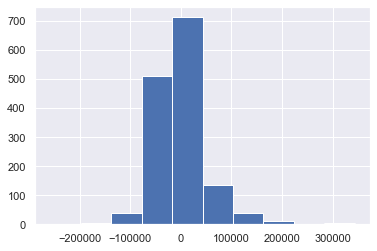

In [43]:
# Linear Model for BsmtFullBath, BsmtHalfBath, FullBath, and HalfBath

from sklearn.linear_model import LinearRegression

X,y = nominal_ordinal_X, train_sun.SalesPrice
X=X.select_dtypes(exclude=[object]) #BsmtFullBath, BsmtHalfBath, FullBath, and HalfBath

lm = LinearRegression()
lm.fit(X, y)
residuals = y - lm.predict(X)
plt.hist(residuals)


import statsmodels.api as sm
x = sm.add_constant(X)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(np.log(y), x)
results = model.fit()
print(results.summary())

## Ordinal Categorical

In [44]:
categorical_ordinal_1 = ["ExterQual", "ExterCond",
                       "BsmtQual", "BsmtCond",
                       "HeatingQC"]

categorical_ordinal_2 = ["BsmtFinType1",
                       "BsmtFinType2"]

categorical_ordinal_target = train_sun.SalesPrice

#### categorical_ordinal_1

In [45]:
train_sun[categorical_ordinal_1]

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC
Id,,,,,
1,Gd,TA,Gd,TA,Ex
2,TA,TA,Gd,TA,Ex
3,Gd,TA,Gd,TA,Ex
4,TA,TA,TA,Gd,Gd
5,Gd,TA,Gd,TA,Ex
...,...,...,...,...,...
1456,TA,TA,Gd,TA,Ex
1457,TA,TA,Gd,TA,TA
1458,Ex,Gd,TA,Gd,Ex


In [46]:
## categorical_ordinal_1 
categorical_ordinal_X = train_sun[categorical_ordinal_1]
categorical_ordinal_y = categorical_ordinal_target



In [47]:
dummy_ExterQual=pd.get_dummies(categorical_ordinal_X.ExterQual, prefix= "ExterQual",drop_first=True)
#R^2= 0.477, p=0.00

dummy_ExterCond=pd.get_dummies(categorical_ordinal_X.ExterCond, prefix= "ExterCond",drop_first=True)
#R^2=0.024

dummy_BsmtQual=pd.get_dummies(categorical_ordinal_X.BsmtQual, prefix= "BsmtQual",drop_first=True)
#R^2=0.0.465 

dummy_BsmtCond=pd.get_dummies(categorical_ordinal_X.BsmtCond, prefix= "BsmtCond",drop_first=True)
#R^2=0.051

dummy_HeatingQC=pd.get_dummies(categorical_ordinal_X.HeatingQC, prefix= "HeatingQC",drop_first=True)
#R^2=0.196

# Best combination: dummy_BsmtQual,dummy_BsmtCond, R^2=0.907, p=0 F=2018

In [48]:
categorical_ordinal_X = pd.concat([dummy_ExterQual,dummy_ExterCond,dummy_BsmtQual,dummy_BsmtCond,dummy_HeatingQC], axis=1)



In [49]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()


In [50]:
scores = {} # used to record the R^2 of each 3-feature combinations

for idx, name1 in enumerate(categorical_ordinal_X.columns):
        myColumns = categorical_ordinal_X.columns[(idx+1):]
        for idx2, name2 in enumerate(myColumns):
            myColumns2 = myColumns[(idx2+1):]
            for idx3, name3 in enumerate(myColumns2):                
                X2 = categorical_ordinal_X[[name1, name2, name3]]
                lm.fit(X2, np.log(y))
                scores[(name1, name2, name3)] = lm.score(X2, np.log(y))

sorted(scores.items(), key=lambda t:t[1], reverse=True)[:15]

[(('ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA'), 0.4611219609466072),
 (('ExterQual_Fa', 'ExterQual_TA', 'BsmtQual_TA'), 0.4427517484049548),
 (('ExterQual_Fa', 'ExterQual_TA', 'ExterCond_Fa'), 0.42949605937115976),
 (('ExterQual_Fa', 'ExterQual_TA', 'BsmtQual_Fa'), 0.42630630112948),
 (('ExterQual_Fa', 'ExterQual_TA', 'HeatingQC_Fa'), 0.4260895513832061),
 (('ExterQual_Fa', 'ExterQual_TA', 'HeatingQC_TA'), 0.42600538338125216),
 (('ExterQual_Fa', 'ExterQual_TA', 'BsmtCond_TA'), 0.4257651017595606),
 (('ExterQual_Fa', 'ExterQual_TA', 'BsmtQual_Gd'), 0.4230527476922904),
 (('ExterQual_Fa', 'ExterQual_TA', 'BsmtCond_Gd'), 0.4224552701118547),
 (('ExterQual_Fa', 'ExterQual_TA', 'BsmtCond_Po'), 0.4220224015797148),
 (('ExterQual_Fa', 'ExterQual_TA', 'ExterCond_TA'), 0.4216435495543065),
 (('ExterQual_Fa', 'ExterQual_TA', 'ExterCond_Po'), 0.4212543709145753),
 (('ExterQual_Fa', 'ExterQual_TA', 'HeatingQC_Po'), 0.42066961142644155),
 (('ExterQual_Fa', 'ExterQual_TA', 'HeatingQC_Gd'), 0.42

In [51]:
lm.fit(categorical_ordinal_X, categorical_ordinal_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

(array([  3.,  42., 556., 694., 134.,  19.,   7.,   2.,   2.,   1.]),
 array([-217332.48883257, -149300.84130231,  -81269.19377205,
         -13237.54624179,   54794.10128847,  122825.74881873,
         190857.396349  ,  258889.04387926,  326920.69140952,
         394952.33893978,  462983.98647004]),
 <a list of 10 Patch objects>)

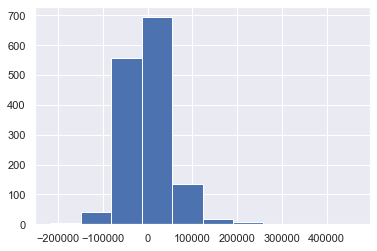

In [52]:
residuals = categorical_ordinal_y - lm.predict(categorical_ordinal_X)

plt.hist(residuals)

In [53]:
#dummy_ExterQual

import statsmodels.api as sm
x = sm.add_constant(dummy_ExterQual)
model = sm.OLS(categorical_ordinal_y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             SalesPrice   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     443.3
Date:                Sun, 31 May 2020   Prob (F-statistic):          1.44e-204
Time:                        17:38:55   Log-Likelihood:                -18070.
No. Observations:                1460   AIC:                         3.615e+04
Df Residuals:                    1456   BIC:                         3.617e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.674e+05   7972.380     46.079   

In [54]:
lm.fit(dummy_ExterQual, categorical_ordinal_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

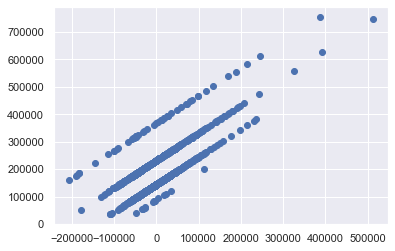

In [55]:
residuals = categorical_ordinal_y - lm.predict(dummy_ExterQual)

plt.scatter(residuals, train_sun.SalesPrice)




In [56]:
print('R^2 is equal to %.3f' %(lm.score(dummy_ExterQual, categorical_ordinal_y)))
print('RSS is equal to %.3f' %(np.sum((categorical_ordinal_y-lm.predict(dummy_ExterQual))**2)))
print('The intercept is %.3f' %(lm.intercept_))

R^2 is equal to 0.477
RSS is equal to 4812167005073.205
The intercept is 367360.962


In [57]:
print('Positive slope columns %s' %(dummy_ExterQual.columns[lm.coef_>0]))
print('--'*50)
print('Negative slope columns %s' %(dummy_ExterQual.columns[lm.coef_<0]))


Positive slope columns Index([], dtype='object')
----------------------------------------------------------------------------------------------------
Negative slope columns Index(['ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA'], dtype='object')


In [58]:
pValues = results.pvalues
print('The significant coefficients')
pValues[pValues<0.05]

The significant coefficients


const           1.123339e-286
ExterQual_Fa     4.912517e-54
ExterQual_Gd     2.657858e-54
ExterQual_TA    4.158230e-132
dtype: float64

#### categorical_ordinal_2

In [59]:
train_sun[categorical_ordinal_2]

,BsmtFinType1,BsmtFinType2
Id,,
1,GLQ,Unf
2,ALQ,Unf
3,GLQ,Unf
4,ALQ,Unf
5,GLQ,Unf
...,...,...
1456,Unf,Unf
1457,ALQ,Rec
1458,GLQ,Unf


In [60]:
## categorical_ordinal_2 
categorical_ordinal_X_2 = train_sun[categorical_ordinal_2]
categorical_ordinal_y = categorical_ordinal_target


In [61]:
dummy_BsmtFinType1=pd.get_dummies(categorical_ordinal_X_2.BsmtFinType1, prefix= "BsmtFinType1",drop_first=True)
dummy_BsmtFinType2=pd.get_dummies(categorical_ordinal_X_2.BsmtFinType2, prefix= "BsmtFinType2",drop_first=True)
dummy_categorical_ordinal_X_2 = pd.concat([dummy_BsmtFinType1,dummy_BsmtFinType2], axis=1)


R^2 is equal to 0.212
RSS is equal to 183.459
The intercept is 11.737


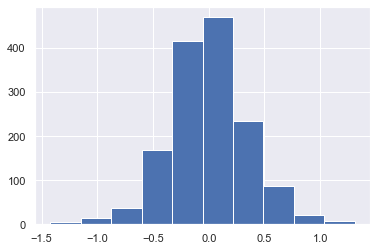

In [62]:
#dummy_categorical_ordinal_X_2 (both type1 and type2)

from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(dummy_categorical_ordinal_X_2 , np.log(categorical_ordinal_y))

residuals = np.log(categorical_ordinal_y) - lm.predict(dummy_categorical_ordinal_X_2 )

plt.hist(residuals)

print('R^2 is equal to %.3f' %(lm.score(dummy_categorical_ordinal_X_2 , np.log(categorical_ordinal_y))))
print('RSS is equal to %.3f' %(np.sum((np.log(categorical_ordinal_y)-lm.predict(dummy_categorical_ordinal_X_2 ))**2)))
print('The intercept is %.3f' %(lm.intercept_))



In [63]:
import statsmodels.api as sm
x = sm.add_constant(dummy_categorical_ordinal_X_2 )
model = sm.OLS(np.log(categorical_ordinal_y), x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             SalesPrice   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     38.97
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.72e-68
Time:                        17:39:02   Log-Likelihood:                -557.48
No. Observations:                1460   AIC:                             1137.
Df Residuals:                    1449   BIC:                             1195.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.7368      0.048  

R^2 is equal to 0.203
RSS is equal to 185.486
The intercept is 11.892


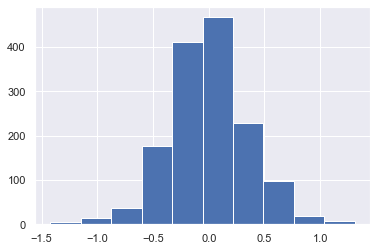

In [64]:
#dummy_BsmtFinType1

from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(dummy_BsmtFinType1, np.log(categorical_ordinal_y))

residuals = np.log(categorical_ordinal_y) - lm.predict(dummy_BsmtFinType1)

plt.hist(residuals)

print('R^2 is equal to %.3f' %(lm.score(dummy_BsmtFinType1, np.log(categorical_ordinal_y))))
print('RSS is equal to %.3f' %(np.sum((np.log(categorical_ordinal_y)-lm.predict(dummy_BsmtFinType1))**2)))
print('The intercept is %.3f' %(lm.intercept_))

In [65]:
import statsmodels.api as sm
x = sm.add_constant(dummy_BsmtFinType1)
model = sm.OLS(np.log(categorical_ordinal_y), x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             SalesPrice   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     74.18
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.51e-69
Time:                        17:39:03   Log-Likelihood:                -565.51
No. Observations:                1460   AIC:                             1143.
Df Residuals:                    1454   BIC:                             1175.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.8923      0.022  

R^2 is equal to 0.023
RSS is equal to 56990977128285.969
The intercept is 11.760


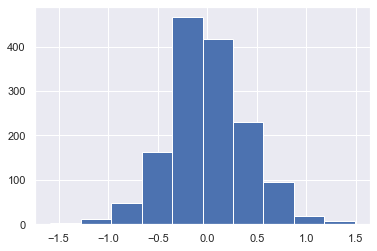

In [66]:
#dummy_BsmtFinType2

from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(dummy_BsmtFinType2, np.log(categorical_ordinal_y))

residuals = np.log(categorical_ordinal_y) - lm.predict(dummy_BsmtFinType2)

plt.hist(residuals)

print('R^2 is equal to %.3f' %(lm.score(dummy_BsmtFinType2, np.log(categorical_ordinal_y))))
print('RSS is equal to %.3f' %(np.sum((categorical_ordinal_y-lm.predict(dummy_BsmtFinType2))**2)))
print('The intercept is %.3f' %(lm.intercept_))

In [67]:
import statsmodels.api as sm
x = sm.add_constant(dummy_BsmtFinType2)
model = sm.OLS(np.log(categorical_ordinal_y), x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             SalesPrice   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     6.848
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.52e-06
Time:                        17:39:04   Log-Likelihood:                -714.37
No. Observations:                1460   AIC:                             1441.
Df Residuals:                    1454   BIC:                             1472.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.7602      0.052  

### Test Model Performance

In [68]:
#feature divisions

quantitative_X=train_sun[quantitative]
quantitative_X
categorical_ordinal_X
dummy_categorical_ordinal_X_2
nominal_ordinal_X
pass

In [108]:
nominal_ordinal_X.head()

,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0
5,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0


In [106]:
#combine features into one dataset for modeling

train_set_model=pd.concat([nominal_ordinal_X,dummy_categorical_ordinal_X_2,categorical_ordinal_X,quantitative_X],axis=1)

y=train_set_model["SalesPrice"] #target
train_set_model.drop(["SalesPrice"], axis=1, inplace= True) #drop target
train_set_model_X = train_set_model.copy()
train_set_model_X.head()


,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,196.0,706,0,150,856,856,854,0,1710
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0.0,978,0,284,1262,1262,0,0,1262
3,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,162.0,486,0,434,920,920,866,0,1786
4,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0.0,216,0,540,756,961,756,0,1717
5,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,350.0,655,0,490,1145,1145,1053,0,2198


In [ ]:
#drop MasVnrArea
train_set_model_X=train_set_model_X.drop("MasVnrArea", axis =1)


In [123]:

train_set_model_X.shape

(1460, 63)

In [126]:
#check missing values 

train_set_model_X.columns[train_set_model_X.isna().any()].tolist()

pd.set_option('display.max_rows', None)

train_set_model_X.isna().sum() #MasVnrArea missing 8 values

train_set_model_X=train_set_model_X.fillna(0) #fill na with 0 
train_set_model_X.isna().sum() #check for no na
pass

In [127]:
train_set_model_X.to_csv("sstrain.csv", header=True)


#### Random Forest Regressor

In [72]:
## TEST MODEL USING Regressor RANDOM FOREST


from sklearn.model_selection import train_test_split
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()


train_set_random_forest_X = train_set_model_X
target_y = y

Xtrain, Xtest, ytrain, ytest = train_test_split(train_set_random_forest_X,target_y, test_size = 0.25)


In [73]:
Xtrain.shape

(1095, 64)

In [74]:
randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [75]:
#before tuning parameters

randomForest.set_params(random_state = 42, n_estimators=150, max_features = 35)
randomForest.fit(Xtrain, ytrain)
randomForest.score(train_set_random_forest_X, target_y)
print("The training score is: %.4f" %(randomForest.score(Xtrain, ytrain)))
print("The test score is: %.4f" %(randomForest.score(Xtest, ytest)))

# super overfit 

#Regressor model scores:
#The training score is: 0.9745
#The test score is: 0.7920

The training score is: 0.9734
The test score is: 0.8561


In [180]:
grid_para_forest = [{
    "n_estimators": [25, 50, 100], #guess large estimators
    "criterion": ["gini", "entropy", "mse"],
    "min_samples_leaf": range(1, 10), #prune to add more leaves for less variance
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    "random_state": [42]}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='r2', cv=5, n_jobs=-1)
%time grid_search_forest.fit(Xtrain, ytrain)

#note scoring='accuracy' for classification model


CPU times: user 22.8 s, sys: 1.81 s, total: 24.6 s
Wall time: 5min 43s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features=35,
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=150, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,

In [181]:
grid_search_forest.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 25,
 'random_state': 42}

In [182]:
#Regression results AFTER tuning params from the best_params

randomForest.set_params(random_state = 42, n_estimators=25, max_features = 35, min_samples_split=8, min_samples_leaf=2, criterion= 'mse')
randomForest.fit(Xtrain, ytrain)
randomForest.score(train_set_random_forest_X, target_y)
print("The training score is: %.4f" %(randomForest.score(Xtrain, ytrain)))
print("The test score is: %.4f" %(randomForest.score(Xtest, ytest)))

#train test is better but test score is still poor

#Regressor model scores:
#The training score is: 0.9373
#The test score is: 0.7783


The training score is: 0.9373
The test score is: 0.7783


In [183]:
rbest = grid_search_forest.best_estimator_
rbest.feature_importances_

array([7.32437082e-03, 8.30508708e-03, 0.00000000e+00, 7.16197506e-06,
       0.00000000e+00, 5.22489601e-03, 7.90003426e-04, 3.17807555e-03,
       3.52213833e-04, 5.85201171e-05, 2.15430112e-05, 0.00000000e+00,
       0.00000000e+00, 8.74135467e-03, 3.62800927e-05, 0.00000000e+00,
       0.00000000e+00, 9.85624604e-04, 1.81537517e-03, 9.00991060e-05,
       0.00000000e+00, 4.11758227e-04, 0.00000000e+00, 3.38942387e-02,
       7.33348100e-03, 3.09911871e-03, 7.77514236e-03, 4.72173733e-04,
       1.53358710e-04, 2.91301741e-03, 4.00902993e-04, 3.66771192e-04,
       1.47982492e-03, 1.28697594e-04, 6.74414699e-05, 6.45939207e-05,
       1.63590415e-04, 5.43367169e-04, 2.90547892e-03, 8.79438185e-03,
       1.68663313e-01, 1.60564512e-03, 5.29798568e-04, 0.00000000e+00,
       7.43618179e-04, 1.65083434e-04, 1.17522143e-02, 1.27798959e-02,
       3.15610207e-04, 0.00000000e+00, 1.21066160e-03, 2.91169933e-04,
       4.97281511e-04, 0.00000000e+00, 1.40010399e-03, 1.17743408e-02,
      

In [196]:
#Regressor Model feature importance

pd.DataFrame(dict(col_name= Xtrain.columns, col_importance = randomForest.feature_importances_)).sort_values(by="col_importance", ascending = False)





,col_name,col_importance
63,GrLivArea,0.244175
59,TotalBsmtSF,0.213486
40,ExterQual_TA,0.168663
61,2ndFlrSF,0.071353
56,BsmtFinSF1,0.069664
60,1stFlrSF,0.062905
23,FullBath_1,0.033894
58,BsmtUnfSF,0.017293
47,BsmtQual_TA,0.012780
55,MasVnrArea,0.011774


In [184]:
grid_search_forest.best_score_

#regressor score 0.818389

0.8183894839178422

#### Random Forest Classifier

In [252]:
## TEST MODEL USING Classifier RANDOM FOREST


from sklearn.model_selection import train_test_split
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()


train_set_random_forest_X = train_set_model_X
target_y = y

Xtrain, Xtest, ytrain, ytest = train_test_split(train_set_random_forest_X,target_y, test_size = 0.25)


In [253]:
#before tuning parameters

randomForest.set_params(random_state = 42, n_estimators=50, max_features = 35, class_weight="balanced")
randomForest.fit(Xtrain, ytrain)
randomForest.score(train_set_random_forest_X, target_y)
print("The training score is: %.4f" %(randomForest.score(Xtrain, ytrain)))
print("The test score is: %.4f" %(randomForest.score(Xtest, ytest)))

# super overfit 

#Classifier model scores without balance:
#The training score is: 0.9945
#The test score is: 0.0027

The training score is: 0.9973
The test score is: 0.0137


In [208]:
grid_para_forest = [{
    "n_estimators": [25, 50,100], #guess large estimators
    "criterion": ["gini", "entropy", "mse"],
    "min_samples_leaf": range(1, 10), #prune to add more leaves for less variance
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    "random_state": [42], 
    "class_weight": ["balanced"]
}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_forest.fit(Xtrain, ytrain)

#note scoring='r2' for regressor model


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 33.1 s, sys: 1.94 s, total: 35 s
Wall time: 1h 13s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=35,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=8,
                                              min_samples_split=24,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=None,
                                              oob_...
                                              verbose=0, warm_st

In [234]:
grid_search_forest.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 25,
 'random_state': 42}

In [244]:
#Classifier results AFTER tuning params from the best_params
#n_estimators": [25, 50]
#less trees results are worse

randomForest.set_params(random_state = 42, n_estimators=50, max_features = 35, min_samples_split=24, min_samples_leaf=8, class_weight="balanced")
randomForest.fit(Xtrain, ytrain)
randomForest.score(train_set_random_forest_X, target_y)
print("The training score is: %.4f" %(randomForest.score(Xtrain, ytrain)))
print("The test score is: %.4f" %(randomForest.score(Xtest, ytest)))

#train test is better but test score is still poor


#Classifier model scores without balance:
#The training score is: 0.7169
#The test score is: 0.0027

The training score is: 0.4868
The test score is: 0.0027


In [254]:
#Classifier results AFTER tuning params from the best_params
#n_estimators": [25, 50,100]

randomForest.set_params(random_state = 42, n_estimators=25, max_features = 35, min_samples_split=24, min_samples_leaf=3)
randomForest.fit(Xtrain, ytrain)
randomForest.score(train_set_random_forest_X, target_y)
print("The training score is: %.4f" %(randomForest.score(Xtrain, ytrain)))
print("The test score is: %.4f" %(randomForest.score(Xtest, ytest)))

#train test is better but test score is still poor

#Classifier model scores without balance:
#The training score is: 0.7717
#The test score is: 0.0192


The training score is: 0.4603
The test score is: 0.0082


In [255]:
grid_search_forest.best_score_

0.01187214611872146

In [256]:
rbest = grid_search_forest.best_estimator_
rbest.feature_importances_

array([1.30013833e-02, 6.70877414e-03, 6.44693710e-04, 1.83225287e-04,
       4.60559681e-05, 3.86321872e-03, 1.99815954e-03, 2.40836823e-02,
       4.30796740e-04, 1.92956414e-04, 6.47609364e-05, 2.68882466e-06,
       1.23505167e-04, 2.65931940e-03, 5.97721218e-04, 7.90480251e-06,
       0.00000000e+00, 3.58375433e-03, 9.84904688e-03, 2.45163280e-04,
       0.00000000e+00, 9.36425338e-04, 7.67182202e-06, 1.19962631e-02,
       5.95737042e-03, 1.05151652e-03, 1.00022220e-02, 1.09900303e-04,
       2.76543184e-03, 5.93346362e-03, 9.82988437e-04, 2.46473383e-03,
       6.07488029e-03, 3.77003216e-04, 2.34290579e-04, 4.54881654e-04,
       3.25636883e-04, 2.72831563e-03, 2.49616407e-04, 1.19122156e-02,
       6.88844671e-02, 4.16781449e-04, 2.62638873e-03, 1.57127053e-04,
       3.38347665e-03, 7.47974635e-04, 1.34971243e-02, 1.23875069e-02,
       1.14619819e-03, 0.00000000e+00, 2.74871282e-03, 8.48476950e-04,
       6.07323090e-03, 0.00000000e+00, 1.03838588e-02, 5.66836627e-02,
      

In [205]:
#Classifier Model feature importance without balance

pd.DataFrame(dict(col_name= Xtrain.columns, col_importance = randomForest.feature_importances_)).sort_values(by="col_importance", ascending = False)


,col_name,col_importance
63,GrLivArea,0.158305
60,1stFlrSF,0.128234
58,BsmtUnfSF,0.124566
59,TotalBsmtSF,0.116995
56,BsmtFinSF1,0.094082
61,2ndFlrSF,0.066941
55,MasVnrArea,0.056334
57,BsmtFinSF2,0.017730
23,FullBath_1,0.015872
7,BsmtExposure_No,0.013493


In [257]:
#Classifier Model feature importance with balance

pd.DataFrame(dict(col_name= Xtrain.columns, col_importance = randomForest.feature_importances_)).sort_values(by="col_importance", ascending = False)


,col_name,col_importance
60,1stFlrSF,0.137998
58,BsmtUnfSF,0.132660
63,GrLivArea,0.129159
59,TotalBsmtSF,0.111033
61,2ndFlrSF,0.081769
56,BsmtFinSF1,0.071914
55,MasVnrArea,0.057336
57,BsmtFinSF2,0.028078
6,BsmtExposure_Mn,0.016883
17,Electrical_SBrkr,0.011031


## Random Forest on all features ##

In [4]:
#load test and training set

train = pd.read_csv('trainmerged123_final.csv')
test = pd.read_csv('testmerged123_final.csv')

In [5]:
dummy_Neighborhood=pd.get_dummies(train.Neighborhood, prefix="Neighborhood", drop_first=True)
dummy_GarageType=pd.get_dummies(train.GarageType, prefix="GarageType", drop_first=True)
dummy_SaleType=pd.get_dummies(train.SaleType, prefix="SaleType", drop_first=True)
dummy_SaleCondition=pd.get_dummies(train.SaleCondition, prefix="SaleCondition", drop_first=True)

dummy_X = pd.concat([dummy_Neighborhood, dummy_GarageType, dummy_SaleType, dummy_SaleCondition], axis=1)

train = pd.concat([train,dummy_X], axis=1)
               

In [6]:
#drop columns that were dummified

train = train.drop(['Neighborhood','GarageType','SaleType','SaleCondition'], axis=1)


In [7]:
train=train.fillna(0)

In [8]:
#prepare data

## separate features and target from trianing set
train_set_X = np.array(train.drop("SalePrice", axis=1))
target_y = np.ravel(train.SalePrice)

In [9]:
## TEST MODEL USING Regressor RANDOM FOREST

from sklearn.model_selection import train_test_split
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()

Xtrain, Xtest, ytrain, ytest = train_test_split(train_set_X,target_y, test_size = 0.30)



In [14]:
#before tuning parameters

randomForest.set_params(random_state = 42, n_estimators=1500, max_features = None, max_depth=15)

randomForest.fit(Xtrain, ytrain)
randomForest.score(Xtrain, ytrain)
print("The training score is: %.4f" %(randomForest.score(Xtrain, ytrain)))
print("The test score is: %.4f" %(randomForest.score(Xtest, ytest)))


#The training score is: 0.9776
#The test score is: 0.8701

The training score is: 0.9776
The test score is: 0.8701


In [21]:
#important features

pd.DataFrame(randomForest.feature_importances_)


,0
0,6.022500e-03
1,1.287242e-03
2,6.522483e-04
3,6.348976e-03
4,1.785559e-02
...,...
150,5.631017e-08
151,1.102908e-05
152,2.787615e-04
153,8.562462e-04


In [199]:
randomForest.predict(Xtrain)

array([ 93385.6636017 , 122409.39723391, 179868.53811344, ...,
       133265.90444681, 233779.04765079, 137700.80373257])

In [23]:
predictions = pd.DataFrame(randomForest.predict(Xtrain))

In [26]:
predictions=predictions.reset_index()

In [27]:
predictions.head()

,index,0
0,0,136003.389507
1,1,138920.167035
2,2,157874.299385
3,3,178518.206554
4,4,141037.144540


In [204]:
randomForest.predict(Xtrain).mean()

179263.54796483682

In [216]:
submission = pd.read_csv("sample_submission.csv") 

In [217]:
submission.shape

(1459, 2)

In [218]:
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [29]:
predictions.to_csv("submission_sandail.csv", index=False)